In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [4]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [5]:
np.random.seed(42)
input_size, hidden_size, output_size = 2, 4, 1
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [6]:
lr = 0.1
epochs = 10000

In [7]:
for epoch in range(epochs):
    
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

In [9]:
    loss = np.mean((y - a2)**2)
    dz2 = (a2 - y) * sigmoid_deriv(z2)
    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2.dot(W2.T) * sigmoid_deriv(z1)
    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

In [11]:
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [12]:
preds = (a2 > 0.5).astype(int)
print("\nPredictions:")
for i in range(len(X)):
    print(f"{X[i]} -> {preds[i]}")


Predictions:
[0 0] -> [0]
[0 1] -> [0]
[1 0] -> [0]
[1 1] -> [0]


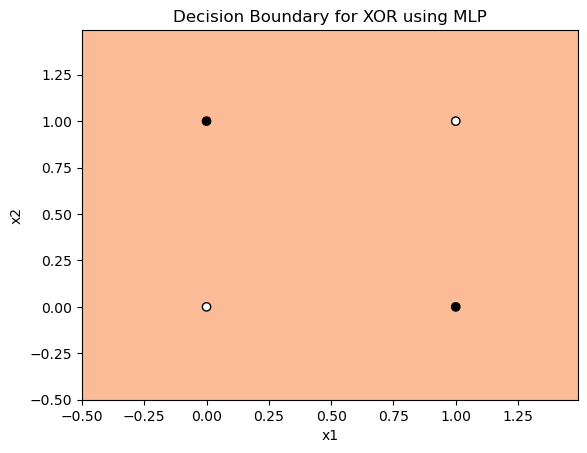

In [13]:
def plot_decision_boundary():
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
   
    a1_grid = sigmoid(grid.dot(W1) + b1)
    a2_grid = sigmoid(a1_grid.dot(W2) + b2)
    Z = a2_grid.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.binary)
    plt.title("Decision Boundary for XOR using MLP")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_decision_boundary()